# Import all the crucial libraries

In [260]:
# Import all library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# Import the dataset

In [261]:
# Import Dataset
dataset = pd.read_csv(r"./Data/Purchased.csv")

# Make it into DataFrame
df = pd.DataFrame(dataset)
df.sample(5).sort_index()


,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [262]:
X = df.iloc[:].values 
Y = df.iloc[:, 3].values

print(f"{X} \n X shape: {X.shape} \n")
print(f"{Y} \n Y shape: {Y.shape}")

[['France' 44.0 72000.0 'No']
 ['Spain' 27.0 48000.0 'Yes']
 ['Germany' 30.0 54000.0 'No']
 ['Spain' 38.0 61000.0 'No']
 ['Germany' 40.0 nan 'Yes']
 ['France' 35.0 58000.0 'Yes']
 ['Spain' nan 52000.0 'No']
 ['France' 48.0 79000.0 'Yes']
 ['Germany' 50.0 83000.0 'No']
 ['France' 37.0 67000.0 'Yes']] 
 X shape: (10, 4) 

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes'] 
 Y shape: (10,)


# Identifying and handling the missing values
In data preprocessing, it is pivotal to identify and correctly handle the missing values, failing to do this, you might draw inaccurate and faulty conclusions and inferences from the data. Needless to say, this will hamper your ML project.

some typical reasons why data is missing:

A. User forgot to fill in a field.

B. Data was lost while transferring manually from a legacy database.

C. There was a programming error.

D. Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

Basically, there are two ways to handle missing data:

Deleting a particular row – In this method, you remove a specific row that has a null value for a feature or a particular column where more than 75% of the values are missing. However, this method is not 100% efficient, and it is recommended that you use it only when the dataset has adequate samples. You must ensure that after deleting the data, there remains no addition of bias. Calculating the mean – This method is useful for features having numeric data like age, salary, year, etc. Here, you can calculate the mean, median, or mode of a particular feature or column or row that contains a missing value and replace the result for the missing value. This method can add variance to the dataset, and any loss of data can be efficiently negated. Hence, it yields better results compared to the first method (omission of rows/columns). Another way of approximation is through the deviation of neighbouring values. However, this works best for linear data.

# Check null values

In [263]:
# check for null values
print(df.isnull().sum()) # check missing values in each column

df.isnull().sum().sum() # total missing values in the dataframe

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


np.int64(2)

# Solution1: Fillna 

In [264]:
df2 = df.copy()

df2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [265]:
print(df2.Salary.mean())
print(df2.Age.mean())

df2.Salary.fillna(df2[['Salary','Age']].mean(),inplace=True)

print(df2.isnull().sum())
df2


63777.77777777778
38.77777777777778
Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Solution2: Scikit-learn

In [266]:
print(X)

[['France' 44.0 72000.0 'No']
 ['Spain' 27.0 48000.0 'Yes']
 ['Germany' 30.0 54000.0 'No']
 ['Spain' 38.0 61000.0 'No']
 ['Germany' 40.0 nan 'Yes']
 ['France' 35.0 58000.0 'Yes']
 ['Spain' nan 52000.0 'No']
 ['France' 48.0 79000.0 'Yes']
 ['Germany' 50.0 83000.0 'No']
 ['France' 37.0 67000.0 'Yes']]


In [267]:
from sklearn.impute import SimpleImputer # Simplemputer is used to handle missing data (null values)

# - Creates an imputer object that will replace np.nan values with the mean of the column.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Selects all rows but only columns 1 and 2 (Python uses 0-based indexing).
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X)

[['France' 44.0 72000.0 'No']
 ['Spain' 27.0 48000.0 'Yes']
 ['Germany' 30.0 54000.0 'No']
 ['Spain' 38.0 61000.0 'No']
 ['Germany' 40.0 63777.77777777778 'Yes']
 ['France' 35.0 58000.0 'Yes']
 ['Spain' 38.77777777777778 52000.0 'No']
 ['France' 48.0 79000.0 'Yes']
 ['Germany' 50.0 83000.0 'No']
 ['France' 37.0 67000.0 'Yes']]


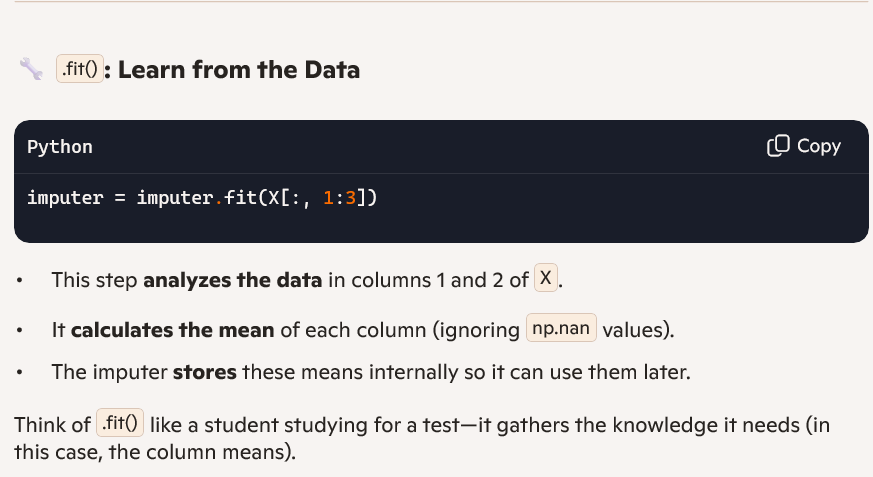

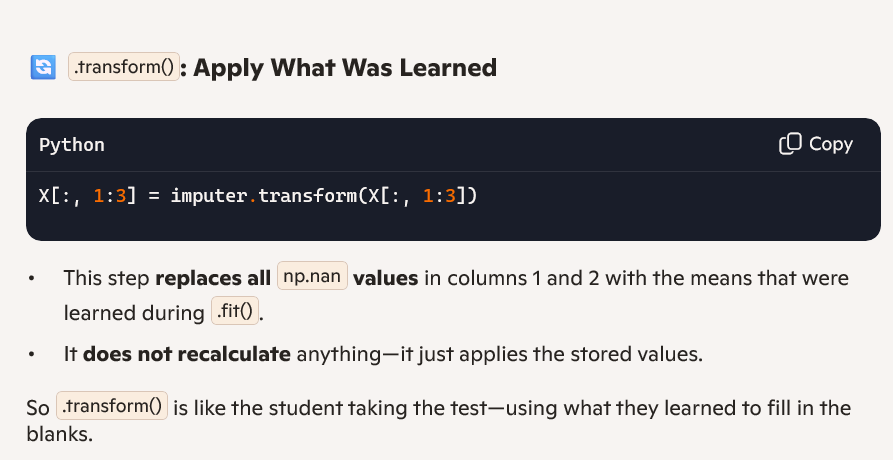

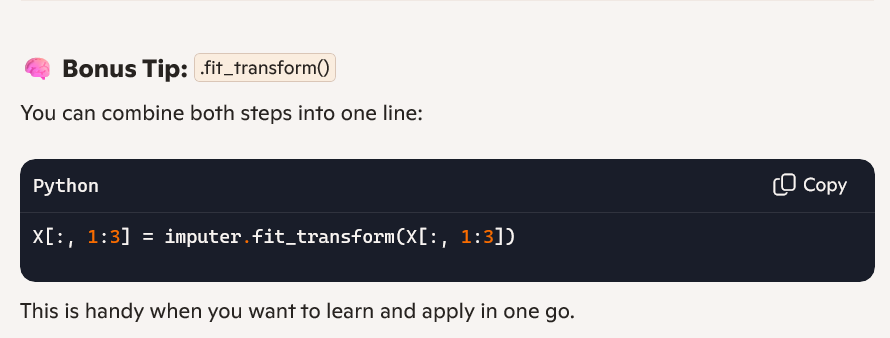

# Encoding the categorical data
Categorical data refers to the information that has specific categories within the dataset. In the dataset cited above, there are two categorical variables – country and purchased.

Machine Learning models are primarily based on mathematical equations. Thus, you can intuitively understand that keeping the categorical data in the equation will cause certain issues since you would only need numbers in the equations.

In [268]:
# Solution 1 : ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)
print(X.shape)

[[1.0 0.0 0.0 44.0 72000.0 'No']
 [0.0 0.0 1.0 27.0 48000.0 'Yes']
 [0.0 1.0 0.0 30.0 54000.0 'No']
 [0.0 0.0 1.0 38.0 61000.0 'No']
 [0.0 1.0 0.0 40.0 63777.77777777778 'Yes']
 [1.0 0.0 0.0 35.0 58000.0 'Yes']
 [0.0 0.0 1.0 38.77777777777778 52000.0 'No']
 [1.0 0.0 0.0 48.0 79000.0 'Yes']
 [0.0 1.0 0.0 50.0 83000.0 'No']
 [1.0 0.0 0.0 37.0 67000.0 'Yes']]
(10, 6)


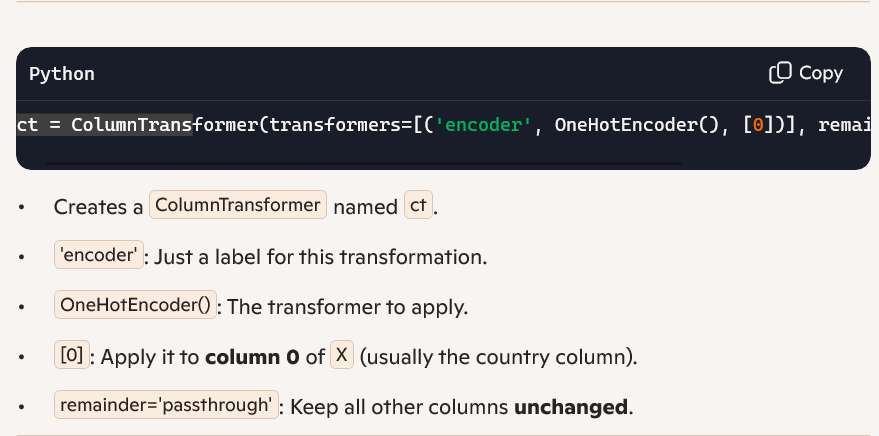

In [269]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0 'No']
 [0.0 0.0 1.0 27.0 48000.0 'Yes']
 [0.0 1.0 0.0 30.0 54000.0 'No']
 [0.0 0.0 1.0 38.0 61000.0 'No']
 [0.0 1.0 0.0 40.0 63777.77777777778 'Yes']
 [1.0 0.0 0.0 35.0 58000.0 'Yes']
 [0.0 0.0 1.0 38.77777777777778 52000.0 'No']
 [1.0 0.0 0.0 48.0 79000.0 'Yes']
 [0.0 1.0 0.0 50.0 83000.0 'No']
 [1.0 0.0 0.0 37.0 67000.0 'Yes']]


# Soluton 2 : Pd.get_dummies()

In [270]:
pd.get_dummies(df2)


,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,True,False,False,True,False
1,27.0,48000.0,False,False,True,False,True
2,30.0,54000.0,False,True,False,True,False
3,38.0,61000.0,False,False,True,True,False
4,40.0,NaN,False,True,False,False,True
5,35.0,58000.0,True,False,False,False,True
6,NaN,52000.0,False,False,True,True,False
7,48.0,79000.0,True,False,False,False,True
8,50.0,83000.0,False,True,False,True,False
9,37.0,67000.0,True,False,False,False,True


# Solution 3 : LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# One-hot encoding
df3 = pd.get_dummies(df2)
df3.isnull().sum()

# Fill missing values
df3.fillna(df3[["Age","Salary"]].mean(),inplace=True)
df3

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.000000,72000.000000,True,False,False,True,False
1,27.000000,48000.000000,False,False,True,False,True
2,30.000000,54000.000000,False,True,False,True,False
3,38.000000,61000.000000,False,False,True,True,False
4,40.000000,63777.777778,False,True,False,False,True
5,35.000000,58000.000000,True,False,False,False,True
6,38.777778,52000.000000,False,False,True,True,False
7,48.000000,79000.000000,True,False,False,False,True
8,50.000000,83000.000000,False,True,False,True,False
9,37.000000,67000.000000,True,False,False,False,True


In [ ]:
cols = ['Country_France','Country_Germany','Country_Spain','Purchased_No','Purchased_Yes']
for col in cols: # if col name = cols 
    df3[col] = label_encoder.fit_transform(df3[col]) # replace with 0 or 1
df3 

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.000000,72000.000000,1,0,0,1,0
1,27.000000,48000.000000,0,0,1,0,1
2,30.000000,54000.000000,0,1,0,1,0
3,38.000000,61000.000000,0,0,1,1,0
4,40.000000,63777.777778,0,1,0,0,1
5,35.000000,58000.000000,1,0,0,0,1
6,38.777778,52000.000000,0,0,1,1,0
7,48.000000,79000.000000,1,0,0,0,1
8,50.000000,83000.000000,0,1,0,1,0
9,37.000000,67000.000000,1,0,0,0,1


In [ ]:
X = df3[['Country_France','Country_Germany','Country_Spain','Purchased_No','Purchased_Yes','Age']]
Y = df3[['Salary']]

print(X)

   Country_France  Country_Germany  Country_Spain  Purchased_No  \
0               1                0              0             1   
1               0                0              1             0   
2               0                1              0             1   
3               0                0              1             1   
4               0                1              0             0   
5               1                0              0             0   
6               0                0              1             1   
7               1                0              0             0   
8               0                1              0             1   
9               1                0              0             0   

   Purchased_Yes        Age  
0              0  44.000000  
1              1  27.000000  
2              0  30.000000  
3              0  38.000000  
4              1  40.000000  
5              1  35.000000  
6              0  38.777778  
7              1  48.0

In [280]:
print(Y)

         Salary
0  72000.000000
1  48000.000000
2  54000.000000
3  61000.000000
4  63777.777778
5  58000.000000
6  52000.000000
7  79000.000000
8  83000.000000
9  67000.000000


# Splitting the dataset
Splitting the dataset is the next step in data preprocessing in machine learning. Every dataset for Machine Learning model must be split into two separate sets – training set and test set.

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

test_size=0.2
- 20% of the data goes into the test set.
- 80% goes into the training set.
- This helps you evaluate how well your model performs on unseen data.



random_state=1
- Sets a seed for random splitting.
- Ensures the split is reproducible—you’ll get the same result every time you run it.

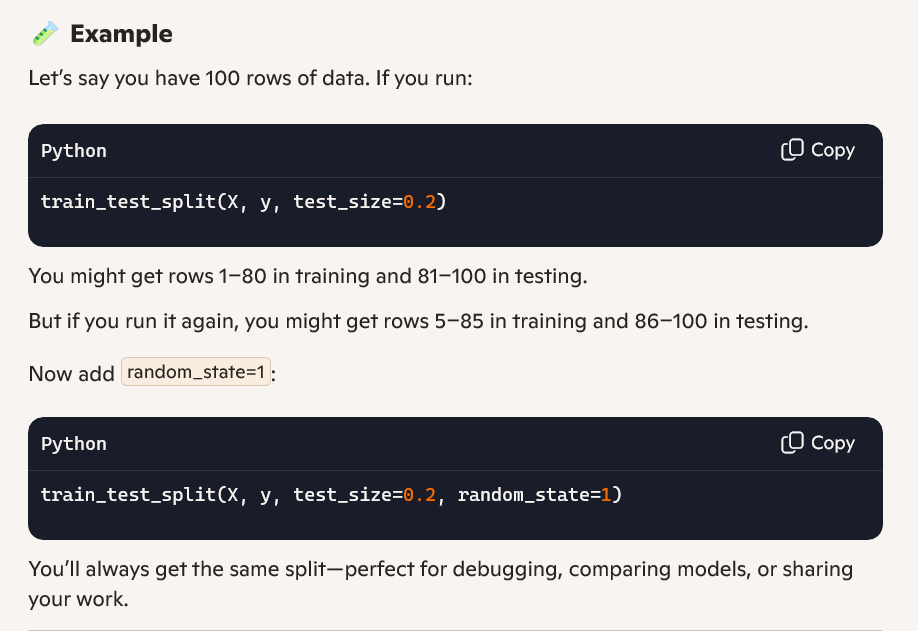

In [ ]:
print(X_train) # 80%

[[0.0 0.0 1.0 38.77777777777778 52000.0 'No']
 [0.0 1.0 0.0 40.0 63777.77777777778 'Yes']
 [1.0 0.0 0.0 44.0 72000.0 'No']
 [0.0 0.0 1.0 38.0 61000.0 'No']
 [0.0 0.0 1.0 27.0 48000.0 'Yes']
 [1.0 0.0 0.0 48.0 79000.0 'Yes']
 [0.0 1.0 0.0 50.0 83000.0 'No']
 [1.0 0.0 0.0 35.0 58000.0 'Yes']]


In [282]:
print(X_test) # 20%

   Country_France  Country_Germany  Country_Spain  Purchased_No  \
2               0                1              0             1   
9               1                0              0             0   

   Purchased_Yes   Age  
2              0  30.0  
9              1  37.0  


# Feature scaling
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range. In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

Another reason why feature scaling is applied is that few algorithms like gradient descent converge much faster with feature scaling than without it.

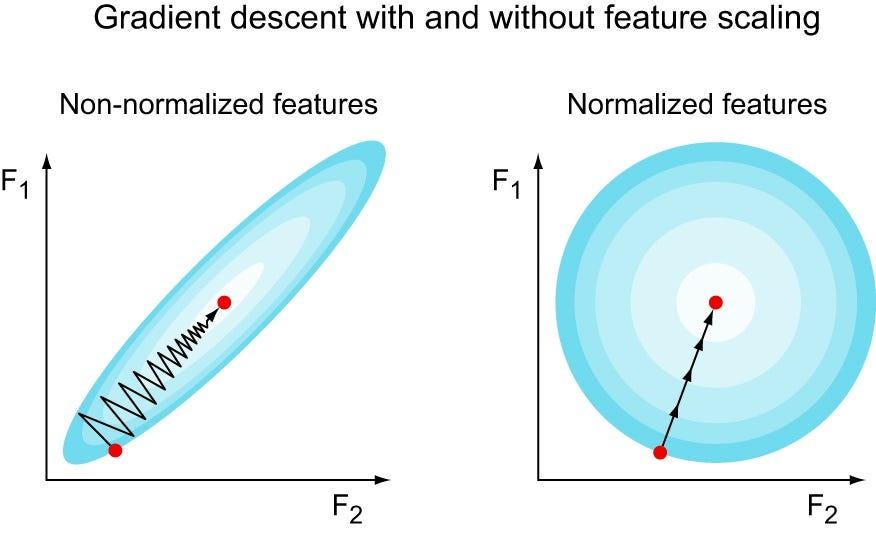

# Why feature scalling?
Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.



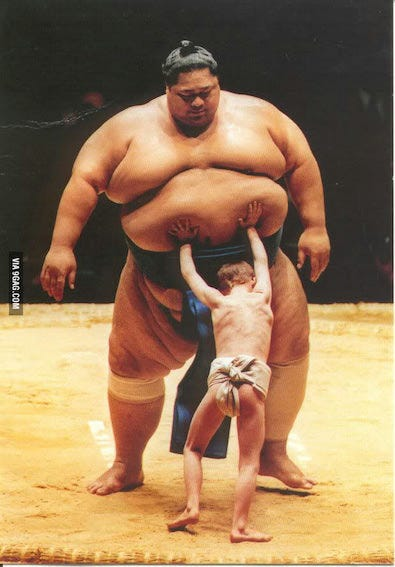

# others method 
https://www.kaggle.com/code/alirezahasannejad/data-preprocessing-in-machine-learning/notebook

In [283]:
# Training the model using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [284]:
# To train and fit the model
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [285]:
#Test Model
y_pred=model.predict(X_test) # Predict the target variable for the test set

print(len(y_pred)) # Show the number of predictions made
y_pred # Show predicted values

2


array([3.33066907e-16, 1.00000000e+00])

In [286]:
#Evaluate Model
mape=np.mean(np.absolute(y_test - y_pred) / y_test * 100) # Calculate Mean Absolute Percentage Error (MAPE)
print('MAPE :', np.round(mape,2)) # Print Error in percentage

MAPE : inf


In [287]:
#Export Model
import joblib
joblib.dump(model,"Predict.pkl")

['Predict.pkl']